### 1. Load IMF_WEO RAW (long)

In [49]:
import pandas as pd
import numpy as np

RAW_PATH = r"C:\Users\pauli\OneDrive\Documentos\GitHub\ea-macro-deceleration-early-warning\data\raw\IMF_WEO.csv"   
df_long = pd.read_csv(RAW_PATH)

print("Raw shape:", df_long.shape)
print("OBS_STATUS counts:\n", df_long["OBS_STATUS"].value_counts(dropna=False))
print("Years:", df_long["TIME_PERIOD"].min(), "-", df_long["TIME_PERIOD"].max())


C:\Users\pauli\AppData\Local\Temp\ipykernel_22232\303640907.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_long = pd.read_csv(RAW_PATH)


Raw shape: (431200, 39)
OBS_STATUS counts:
 OBS_STATUS
A    270612
O    108763
F     51825
Name: count, dtype: int64
Years: 1980 - 2029


### 2. Filter Actual oobservations only

In [28]:
# filter only A observations
df_a = df_long[df_long["OBS_STATUS"].astype(str).str.upper().eq("A")].copy()

df_a["TIME_PERIOD"] = pd.to_numeric(df_a["TIME_PERIOD"], errors="coerce")
df_a["OBS_VALUE"]   = pd.to_numeric(df_a["OBS_VALUE"], errors="coerce")

print("Only A shape:", df_a.shape)
print("Years (A):", int(df_a["TIME_PERIOD"].min()), "-", int(df_a["TIME_PERIOD"].max()))



Only A shape: (270612, 39)
Years (A): 1980 - 2023


### 3. Save IMF_WEO A only (long)

In [29]:
# save to interim
INTERIM_PATH = r"C:\Users\pauli\OneDrive\Documentos\GitHub\ea-macro-deceleration-early-warning\data\interim\IMF_WEO_A.csv"  
df_a.to_csv(INTERIM_PATH, index=False)
    

### 4. Load IMF_WEO_A RAW (long)

In [30]:
# load IMF_WEO_A.csv to check
import pandas as pd
import numpy as np

RAW_PATH = r"C:\Users\pauli\OneDrive\Documentos\GitHub\ea-macro-deceleration-early-warning\data\interim\IMF_WEO_A.csv"   
df_long = pd.read_csv(RAW_PATH)

print("Raw shape:", df_long.shape)
print("OBS_STATUS counts:\n", df_long["OBS_STATUS"].value_counts(dropna=False))
print("Years:", df_long["TIME_PERIOD"].min(), "-", df_long["TIME_PERIOD"].max())


Raw shape: (270612, 39)
OBS_STATUS counts:
 OBS_STATUS
A    270612
Name: count, dtype: int64
Years: 1980 - 2023


C:\Users\pauli\AppData\Local\Temp\ipykernel_22232\2304320059.py:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_long = pd.read_csv(RAW_PATH)


### 5. Select Region (EA)

In [31]:
# filter only EA19 + 1980-2023
EA_19 = [
    "DEU","FRA","ITA","ESP","NLD","BEL","AUT","FIN","IRL","PRT","GRC",
    "SVK","SVN","EST","LVA","LTU","LUX","MLT","CYP"
]

df_a = df_a[df_a["REF_AREA"].isin(EA_19)].copy()
df_a = df_a[df_a["TIME_PERIOD"].between(1980, 2023)].copy()

print("EA19 + 1980-2023 (A) shape:", df_a.shape)
print("Countries:", df_a["REF_AREA"].nunique())



EA19 + 1980-2023 (A) shape: (31111, 39)
Countries: 19


### 6. Pivot long to wide (panel)

In [32]:
# pivot to wide format
df_wide = (
    df_a.pivot_table(
        index=["REF_AREA", "TIME_PERIOD"],
        columns="INDICATOR",
        values="OBS_VALUE",
        aggfunc="mean"
    )
    .reset_index()
    .sort_values(["REF_AREA","TIME_PERIOD"])
)

print("Wide shape:", df_wide.shape)
df_wide.head()



Wide shape: (775, 46)


INDICATOR,REF_AREA,TIME_PERIOD,IMF_WEO_BCA,IMF_WEO_BCA_NGDPD,IMF_WEO_GGR,IMF_WEO_GGR_NGDP,IMF_WEO_GGSB,IMF_WEO_GGSB_NPGDP,IMF_WEO_GGX,IMF_WEO_GGXCNL,...,IMF_WEO_PCPIEPCH,IMF_WEO_PCPIPCH,IMF_WEO_PPPEX,IMF_WEO_PPPGDP,IMF_WEO_PPPPC,IMF_WEO_PPPSH,IMF_WEO_TMG_RPCH,IMF_WEO_TM_RPCH,IMF_WEO_TXG_RPCH,IMF_WEO_TX_RPCH
0,AUT,1980,-3.865,-4.776,NaN,NaN,-1.502,NaN,NaN,NaN,...,6.661,6.325,0.897,84.660,11227.43,0.631,7.115,6.170,5.240,5.227
1,AUT,1981,-3.042,-4.338,NaN,NaN,-0.696,NaN,NaN,NaN,...,6.407,6.807,0.874,92.577,12252.79,0.618,-1.618,-0.771,7.714,5.063
2,AUT,1982,0.703,1.003,NaN,NaN,-2.112,NaN,NaN,NaN,...,4.726,5.440,0.867,100.173,13241.50,0.627,-3.463,-4.667,4.078,1.591
3,AUT,1983,0.276,0.389,NaN,NaN,3.416,NaN,NaN,NaN,...,3.785,3.335,0.865,107.015,14187.69,0.629,6.575,5.691,5.682,3.638
4,AUT,1984,-0.178,-0.266,NaN,NaN,-1.221,NaN,NaN,NaN,...,5.049,5.665,0.873,111.245,14746.94,0.605,10.972,10.050,7.754,6.334


### 7. Coverage (Variables)

In [33]:
# % non-missing per variable (coverage)
coverage = (
    df_wide.drop(columns=["REF_AREA","TIME_PERIOD"])
          .notna()
          .mean()
          .sort_values(ascending=False)
)

print("Top 30 variables by coverage:\n", coverage.head(30))



Top 30 variables by coverage:
 INDICATOR
IMF_WEO_PPPGDP        0.993548
IMF_WEO_PPPSH         0.993548
IMF_WEO_PCPI          0.993548
IMF_WEO_PPPEX         0.993548
IMF_WEO_NID_NGDP      0.993548
IMF_WEO_NGSD_NGDP     0.993548
IMF_WEO_NGDPRPPPPC    0.990968
IMF_WEO_LP            0.990968
IMF_WEO_PPPPC         0.990968
IMF_WEO_PCPIPCH       0.984516
IMF_WEO_NGDPD         0.974194
IMF_WEO_NGDP          0.974194
IMF_WEO_NGDPDPC       0.971613
IMF_WEO_NGDPPC        0.971613
IMF_WEO_LUR           0.970323
IMF_WEO_LE            0.970323
IMF_WEO_NGDP_R        0.967742
IMF_WEO_NGDP_D        0.967742
IMF_WEO_NGDPRPC       0.965161
IMF_WEO_TM_RPCH       0.963871
IMF_WEO_TX_RPCH       0.962581
IMF_WEO_PCPIE         0.958710
IMF_WEO_NGDP_RPCH     0.957419
IMF_WEO_NGDP_FY       0.956129
IMF_WEO_PCPIEPCH      0.948387
IMF_WEO_BCA           0.944516
IMF_WEO_BCA_NGDPD     0.941935
IMF_WEO_NGAP_NPGDP    0.874839
IMF_WEO_TMG_RPCH      0.874839
IMF_WEO_TXG_RPCH      0.874839
dtype: float64


### 8. Filter Variables with >=85% coverage

In [34]:
# filter vars with >= 85% coverage
min_cov = 0.85
good_vars = coverage[coverage >= min_cov].index.tolist()

print("Vars with coverage >= 85%:", len(good_vars))
print(good_vars[:25])



Vars with coverage >= 85%: 33
['IMF_WEO_PPPGDP', 'IMF_WEO_PPPSH', 'IMF_WEO_PCPI', 'IMF_WEO_PPPEX', 'IMF_WEO_NID_NGDP', 'IMF_WEO_NGSD_NGDP', 'IMF_WEO_NGDPRPPPPC', 'IMF_WEO_LP', 'IMF_WEO_PPPPC', 'IMF_WEO_PCPIPCH', 'IMF_WEO_NGDPD', 'IMF_WEO_NGDP', 'IMF_WEO_NGDPDPC', 'IMF_WEO_NGDPPC', 'IMF_WEO_LUR', 'IMF_WEO_LE', 'IMF_WEO_NGDP_R', 'IMF_WEO_NGDP_D', 'IMF_WEO_NGDPRPC', 'IMF_WEO_TM_RPCH', 'IMF_WEO_TX_RPCH', 'IMF_WEO_PCPIE', 'IMF_WEO_NGDP_RPCH', 'IMF_WEO_NGDP_FY', 'IMF_WEO_PCPIEPCH']


### 9. Select Variables

In [ ]:
# Select candidate macro variables
# SABINA COMMENT: Why choose only these variables? There should be some explanation somewhere
candidate_vars = [
    "IMF_WEO_NGDP_RPCH",
    "IMF_WEO_LUR",
    "IMF_WEO_LP",
    "IMF_WEO_PCPIPCH",
    "IMF_WEO_NID_NGDP",
    "IMF_WEO_NGSD_NGDP",
    "IMF_WEO_TM_RPCH",
    "IMF_WEO_TX_RPCH",
    "IMF_WEO_TMG_RPCH",
    "IMF_WEO_TXG_RPCH",
    "IMF_WEO_BCA_NGDPD",
    "IMF_WEO_NGAP_NPGDP"
]

df_test = df_wide[candidate_vars].copy()

df_test = df_test.apply(pd.to_numeric, errors="coerce")
df_test = df_test.dropna()



### 10. Correlation Matrix

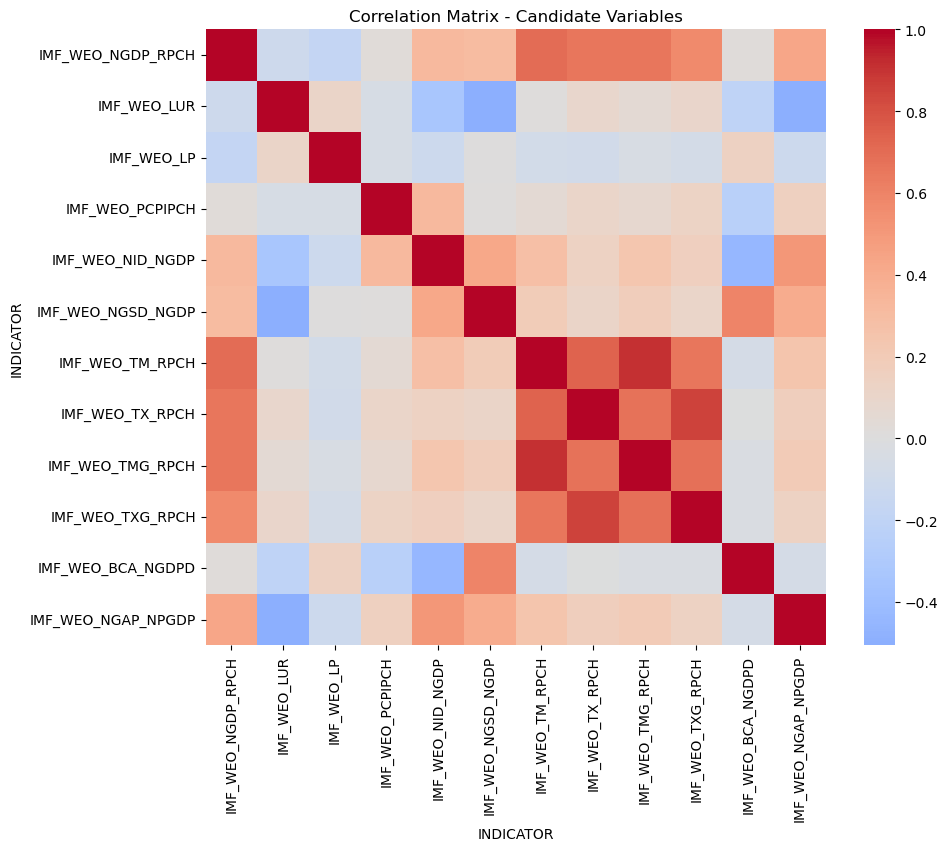

In [ ]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_test.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix - Candidate Variables")
plt.show()

# SABINA COMMENT: Make sure that the heatmap colors go from -1 to 1
# Otherwise you have a lot of values that are close to 0 but look like 
# they are mild positive correlations (orange)
# Please also add the numbers!

### 11. Detect high correlations

In [37]:
# Identify highly correlated pairs (|corr| > 0.8)
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        val = corr.iloc[i,j]
        if abs(val) > 0.8:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], val))

print("Highly correlated pairs (|corr| > 0.8):")
for pair in high_corr_pairs:
    print(pair)



Highly correlated pairs (|corr| > 0.8):
('IMF_WEO_TM_RPCH', 'IMF_WEO_TMG_RPCH', np.float64(0.9071513915059569))
('IMF_WEO_TX_RPCH', 'IMF_WEO_TXG_RPCH', np.float64(0.8504511449230627))


### 12. VIF (Variance Inflation Factor)

In [38]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(df_test)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

print(vif_data.sort_values("VIF", ascending=False))


              Variable        VIF
0                const  78.178505
11   IMF_WEO_BCA_NGDPD  19.847967
6    IMF_WEO_NGSD_NGDP  19.197435
5     IMF_WEO_NID_NGDP  15.649214
7      IMF_WEO_TM_RPCH   8.119559
9     IMF_WEO_TMG_RPCH   7.074375
8      IMF_WEO_TX_RPCH   5.601411
10    IMF_WEO_TXG_RPCH   4.412017
1    IMF_WEO_NGDP_RPCH   2.783467
12  IMF_WEO_NGAP_NPGDP   1.958827
2          IMF_WEO_LUR   1.763837
4      IMF_WEO_PCPIPCH   1.213298
3           IMF_WEO_LP   1.104128


SABINA COMMENT: Conclusioooooooonssssssss????
You have huge VIFs here

### 13.

In [39]:
# -----------------------------
# define final variables
# -----------------------------

final_vars = [
    "IMF_WEO_NGDP_RPCH",
    "IMF_WEO_LUR",
    "IMF_WEO_LP",
    "IMF_WEO_PCPIPCH",
    "IMF_WEO_TM_RPCH",
    "IMF_WEO_TX_RPCH",
    "IMF_WEO_BCA_NGDPD",
    "IMF_WEO_NGAP_NPGDP",
    "IMF_WEO_NGSD_NGDP"
]

id_cols = ["REF_AREA", "TIME_PERIOD"]

# -----------------------------
#  verify all final variables are in the data
# -----------------------------

missing_cols = [c for c in final_vars if c not in df_wide.columns]

if missing_cols:
    print("⚠️ Missing columns:", missing_cols)
else:
    print("✔ All selected variables found.")

# -----------------------------
# create final panel dataset with selected variables
# -----------------------------

df_panel = df_wide[id_cols + final_vars].copy()

# transform to numeric
for col in final_vars:
    df_panel[col] = pd.to_numeric(df_panel[col], errors="coerce")

print("Panel shape:", df_panel.shape)

# -----------------------------
# quick check of missing values
# -----------------------------
coverage = df_panel[final_vars].notna().mean().sort_values(ascending=False)
print("\nCoverage by variable:")
print(coverage)

print("\nTotal missing values:")
print(df_panel[final_vars].isna().sum().sort_values(ascending=False))




✔ All selected variables found.
Panel shape: (775, 11)

Coverage by variable:
INDICATOR
IMF_WEO_NGSD_NGDP     0.993548
IMF_WEO_LP            0.990968
IMF_WEO_PCPIPCH       0.984516
IMF_WEO_LUR           0.970323
IMF_WEO_TM_RPCH       0.963871
IMF_WEO_TX_RPCH       0.962581
IMF_WEO_NGDP_RPCH     0.957419
IMF_WEO_BCA_NGDPD     0.941935
IMF_WEO_NGAP_NPGDP    0.874839
dtype: float64

Total missing values:
INDICATOR
IMF_WEO_NGAP_NPGDP    97
IMF_WEO_BCA_NGDPD     45
IMF_WEO_NGDP_RPCH     33
IMF_WEO_TX_RPCH       29
IMF_WEO_TM_RPCH       28
IMF_WEO_LUR           23
IMF_WEO_PCPIPCH       12
IMF_WEO_LP             7
IMF_WEO_NGSD_NGDP      5
dtype: int64


### 14. Check duplicates

In [40]:
# check for duplicates
duplicates = df_panel.duplicated(subset=id_cols, keep=False)
if duplicates.any():
    print("⚠️ Duplicates found:")
    print(df_panel[duplicates])
else:
    print("✔ No duplicates found.")



✔ No duplicates found.


### 15. Check for missing values in key variables 

In [41]:
# check for missing values in key variables
key_vars = ["IMF_WEO_NGDP_RPCH", "IMF_WEO_LUR", "IMF_WEO_LP"]
missing_key = df_panel[key_vars].isna().sum()
print("\nMissing values in key variables:")
print(missing_key)



Missing values in key variables:
INDICATOR
IMF_WEO_NGDP_RPCH    33
IMF_WEO_LUR          23
IMF_WEO_LP            7
dtype: int64


### 16. Handling missing values

In [ ]:
# -----------------------------
# impute missing values with temporal fill (forward + backward fill by country)
# -----------------------------

macro_vars = [
    "IMF_WEO_NGDP_RPCH",
    "IMF_WEO_LUR",
    "IMF_WEO_LP",
    "IMF_WEO_PCPIPCH",
    "IMF_WEO_TM_RPCH",
    "IMF_WEO_TX_RPCH",
    "IMF_WEO_BCA_NGDPD",
    "IMF_WEO_NGAP_NPGDP",
    "IMF_WEO_NGSD_NGDP"
]

df_panel = df_panel.sort_values(["REF_AREA", "TIME_PERIOD"])

df_panel[macro_vars] = (
    df_panel.groupby("REF_AREA")[macro_vars]
            .transform(lambda g: g.ffill().bfill())
)

print("Missing after temporal fill:")
print(df_panel[macro_vars].isna().sum())

# SABINA COMMENT: Interesting choice, not bad! But I would say it's fine to remove the nulls altogether

Missing after temporal fill:
INDICATOR
IMF_WEO_NGDP_RPCH      0
IMF_WEO_LUR            0
IMF_WEO_LP             0
IMF_WEO_PCPIPCH        0
IMF_WEO_TM_RPCH        0
IMF_WEO_TX_RPCH        0
IMF_WEO_BCA_NGDPD      0
IMF_WEO_NGAP_NPGDP    66
IMF_WEO_NGSD_NGDP      0
dtype: int64


### 17. Villing with median (for more missing after imputing)

In [43]:
# if there are still missing values, fill with median by country
df_panel[macro_vars] = (
    df_panel.groupby("REF_AREA")[macro_vars]
            .transform(lambda g: g.fillna(g.median()))
)

print("Missing after median fill:")
print(df_panel[macro_vars].isna().sum())



Missing after median fill:
INDICATOR
IMF_WEO_NGDP_RPCH      0
IMF_WEO_LUR            0
IMF_WEO_LP             0
IMF_WEO_PCPIPCH        0
IMF_WEO_TM_RPCH        0
IMF_WEO_TX_RPCH        0
IMF_WEO_BCA_NGDPD      0
IMF_WEO_NGAP_NPGDP    66
IMF_WEO_NGSD_NGDP      0
dtype: int64


### 18. Quick check

In [47]:
# check shape and missing values after imputation
print("Final panel shape:", df_panel.shape)
print("Missing values after imputation:")
print(df_panel[macro_vars].isna().sum().sort_values(ascending=False))


Final panel shape: (775, 11)
Missing values after imputation:
INDICATOR
IMF_WEO_NGAP_NPGDP    66
IMF_WEO_NGDP_RPCH      0
IMF_WEO_LUR            0
IMF_WEO_PCPIPCH        0
IMF_WEO_LP             0
IMF_WEO_TM_RPCH        0
IMF_WEO_TX_RPCH        0
IMF_WEO_BCA_NGDPD      0
IMF_WEO_NGSD_NGDP      0
dtype: int64


### 19. Save panel to interim: data IMF_WEO_A_panel

In [48]:
# save new dataset with selected variables and imputed values
INTERIM_PATH = r"C:\Users\pauli\OneDrive\Documentos\GitHub\ea-macro-deceleration-early-warning\data\interim\IMF_WEO_A_panel.csv"
df_panel.to_csv(INTERIM_PATH, index=False)


SABINA COMMENT: Really clean and well-structured notebook, it just needs more thoughts from your side! Well done!